In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd


from datetime import datetime, date
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')




In [2]:
# getting s&p data for sp500 and sp1000 (sp400 + sp600)
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks'
url2 = 'https://en.wikipedia.org/wiki/List_of_S%26P_1000_companies'
sp500 = pd.read_html(url)[0]
sp500.columns = [c.lower() for c in sp500.columns]
sp1000 = pd.read_html(url2)[5]
sp1000.columns = [c.lower() for c in sp1000.columns]

# checking and removing overlap
sp500_s = [s for s in sp500['symbol']]
sp1000_s = [s for s in sp1000['ticker symbol']]

duplicates = [s for s in sp1000_s if s in sp500_s]

sp1000 = sp1000[~sp1000['ticker symbol'].isin(duplicates)]

# fixing columns
cols_500 = {'symbol':'symbol','security':'name', 'gics sector':'sector', 'gics sub industry':'industry'}
cols_1000 =  {'company':'name', 'ticker symbol' : 'symbol', 'gics economic sector':'sector', 'gics sub-industry':'industry'}

sp500.rename(columns = cols_500, inplace=True)
sp1000.rename(columns = cols_1000, inplace=True)

columns = ['name', 'symbol','sector','industry']

sp1000 = sp1000[columns]
sp500 = sp500[columns]

# merging dataframes
sp1500 = pd.concat([sp1000,sp500])

#ticker list
tick_list = [s for s in sp1500['symbol']]

In [3]:
tick_string = ' '
tick_string = tick_string.join(tick_list)

In [4]:
import yfinance as yf

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = tick_string,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "2y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1wk",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
# %time

[*********************100%***********************]  1481 of 1481 completed

47 Failed downloads:
- MOG.A: No data found, symbol may be delisted
- HPT: No data found, symbol may be delisted
- EFII: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- CJ: No data found, symbol may be delisted
- ACXM: No data found for this date range, symbol may be delisted
- BOFI: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- SRCI: No data found, symbol may be delisted
- ATU: No data found, symbol may be delisted
- CTRL: No data found, symbol may be delisted
- TTS: No data found, symbol may be delisted
- HYH: No data found for this date range, symbol may be delisted
- LTXB: No data found, symbol may be delisted
- BEL: No data found, symbol may be delisted
- VSM: No data found, symbol may be delisted
- SFLY: No data found, symbol may be delisted
- EDR: No data found, symbol may be delisted
- 

In [5]:
data

GWR                                                 \
                  Open        High         Low       Close     Volume   
Date                                                                    
2018-04-09   68.650002   71.720001   67.610001   71.070000  2960519.0   
2018-04-12         NaN         NaN         NaN         NaN        NaN   
2018-04-16   71.500000   72.989998   70.470001   70.680000  2510386.0   
2018-04-23   70.489998   73.209999   69.800003   73.129997  2929361.0   
2018-04-30   72.989998   74.940002   69.069397   74.099998  4919842.0   
2018-05-07   74.720001   78.089996   74.389999   77.279999  2500428.0   
2018-05-14   77.680000   78.370003   76.464996   77.440002  1835599.0   
2018-05-21   78.000000   78.620003   76.014999   77.720001  2181889.0   
2018-05-28   76.879997   80.269997   76.790001   79.019997  1437919.0   
2018-06-04   79.199997   80.220001   77.680000   80.129997  1422129.0   
2018-06-11   79.970001   82.180000   78.510002   81.930000  2112825.0   
2018-06-14         NaN         NaN         NaN         NaN        NaN   
2018-06-18   81.489998   82.964996   80.160004   82.029999  2667660.0   
2018-06-25   81.599998   82.099998   79.599998   81.320000  1681791.0   
2018-07-02   80.820000   83.675003   80.500000   83.279999  1604536.0   
2018-07-09   83.849998   85.099998   82.260002   83.459999  1700739.0   
2018-07-13         NaN         NaN         NaN         NaN        NaN   
2018-07-16   83.760002   84.010002   80.470001   83.629997  3202396.0   
2018-07-23   83.580002   85.910004   82.150002   83.169998  3108144.0   
2018-07-30   82.599998   88.680000   81.750000   88.400002  3973490.0   
2018-08-06   88.440002   89.709999   86.669998   87.080002  3603393.0   
2018-08-13   87.559998   88.577599   85.801102   87.610001  2083232.0   
2018-08-14         NaN         NaN         NaN         NaN        NaN   
2018-08-20   88.000000   89.000000   87.160004   88.099998  1825354.0   
2018-08-27   88.650002   90.190002   87.199997   87.889999  1647618.0   
2018-09-03   87.790001   89.080002   86.519997   88.099998  1604114.0   
2018-09-10   88.489998   89.089996   87.540001   89.050003  1145780.0   
2018-09-14         NaN         NaN         NaN         NaN        NaN   
2018-09-17   89.180000   91.860001   88.010002   91.400002  2730057.0   
2018-09-24   91.699997   92.589996   90.175003   90.989998  3123968.0   
...                ...         ...         ...         ...        ...   
2019-10-28  111.150002  111.430000  110.669998  111.309998  2496392.0   
2019-11-04  111.300003  111.540001  111.000000  111.339996  2081517.0   
2019-11-11  111.150002  111.550003  111.150002  111.410004  1689907.0   
2019-11-14         NaN         NaN         NaN         NaN        NaN   
2019-11-18  111.400002  111.629997  111.205002  111.370003  3457041.0   
2019-11-25  111.470001  111.540001  111.209999  111.449997  1136306.0   
2019-12-02  111.480003  111.599998  110.559998  111.089996  2821576.0   
2019-12-09  111.000000  111.360001  109.959999  111.260002  5268835.0   
2019-12-13         NaN         NaN         NaN         NaN        NaN   
2019-12-16  111.379997  111.449997  110.860001  111.190002  1969475.0   
2019-12-23  111.129997  111.970001  111.029999  111.879997  6659831.0   
2019-12-30         NaN         NaN         NaN         NaN        NaN   
2020-01-06         NaN         NaN         NaN         NaN        NaN   
2020-01-13         NaN         NaN         NaN         NaN        NaN   
2020-01-14         NaN         NaN         NaN         NaN        NaN   
2020-01-20         NaN         NaN         NaN         NaN        NaN   
2020-01-27         NaN         NaN         NaN         NaN        NaN   
2020-02-03         NaN         NaN         NaN         NaN        NaN   
2020-02-10         NaN         NaN         NaN         NaN        NaN   
2020-02-13         NaN         NaN         NaN         NaN        NaN   
2020-02-17         NaN         NaN         NaN         NaN        NaN   
2020

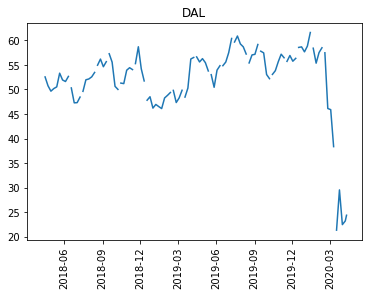

In [7]:
tick='DAL'
plt.plot(data[tick]['Close'])
plt.xticks(rotation=90)
plt.title(tick)
plt.show()

In [8]:
# latest_date = str(data.index[-3])
latest_date = '2020-04-09'
# lastyear_date = data.index[-3] + relativedelta(years=-1)
lastyear_date = '2019-04-08'

print(data[tick].loc[lastyear_date]['Close'])

print(data[tick].loc[latest_date]['Close'])
# latest_date

56.52095413208008
24.389999389648438


In [9]:
# tick='UAL'
# info = yf.Ticker(tick)
# # info.info['sharesOutstanding']
# info.balance_sheet

In [10]:
def get_change(tick):
    pre = data[tick].loc[lastyear_date]['Close']
    post = data[tick].loc[latest_date]['Close']
    return (post-pre)/pre

def get_pre(tick):
    return data[tick].loc[lastyear_date]['Close']

def get_post(tick):
    return data[tick].loc[latest_date]['Close']

def get_so(tick):
    info = yf.Ticker(tick)
    try:
        shares = info.info['sharesOutstanding']
    except:
        shares = 0
        pass
    return shares

def get_mcap(tick):
    return 

In [11]:
get_pre('UAL')

85.48999786376953

In [12]:
len(sp1500['sector'].unique())

14

In [21]:
sector = 'Industrials'
temp_ = sp1500[sp1500['sector']==sector]


for t in temp_['industry'].unique():
    print(t)

    print('start')
    temp_['pre'] = temp_['symbol'].apply(get_pre)
    print('pre')
    temp_['post'] = temp_['symbol'].apply(get_post)
    print('post')
    temp_['shares_out'] = temp_['symbol'].apply(get_so)
    print('so')
    temp_['pre_mktcap'] = temp_[['pre','shares_out']].product(axis=1)
    print('premkt')
    temp_['post_mktcap'] = temp_[['post','shares_out']].product(axis=1)
    print('postmkt')
    print('{:,}'.format(temp_['pre_mktcap'].sum()))
    print('{:,}'.format(temp_['post_mktcap'].sum()))
#     break



Building Products
start
pre
post
so
premkt
postmkt
1,919,049,101,115.1636
1,595,454,354,620.6035
Air Freight and Logistics
start
pre
post
so
premkt
postmkt
2,032,407,108,872.4736
1,596,728,910,279.2131
Aerospace and Defense
start
pre
post
so
premkt
postmkt
2,068,451,887,873.6877
1,627,425,640,044.4678
Environmental and Facilities Services
start
pre
post
so
premkt
postmkt
2,051,137,458,862.7935
1,709,071,218,064.1318
Construction & Engineering
start
pre
post
so
premkt
postmkt
1,963,970,183,873.7249
1,629,536,719,710.2998
Construction and Engineering
start
pre
post
so
premkt
postmkt
2,022,110,674,327.8452
1,677,856,585,832.5151
Construction & Farm Equipment & Heavy Trucks
start
pre
post
so
premkt
postmkt
1,957,639,393,315.525
1,625,320,587,087.1848
Industrial Machinery
start
pre
post
so
premkt
postmkt
1,942,355,452,816.0447
1,620,492,510,647.3477
Trading Companies and Distributors
start
pre
post
so
premkt
postmkt
1,944,135,318,931.8643
1,612,391,455,119.3755
Construction Machinery and He

KeyboardInterrupt: 

In [ ]:
len(temp_['industry'].unique())
%timeit